<p style="font-size: 20px">
    <center>
        <b>Auteur</b> : Pierjos Francis <b>COLERE MBOUKOU</b><br/>
        <b>Portfolio</b> : <a href="https://pierjoscolere.netlify.app" target="_blank">https://pierjoscolere.netlify.app</a><br/>
        <b>Emails</b> : <a href="mailto:Pierjos.COLERE@um6p.ma" target="_blank">Pierjos.COLERE@um6p.ma</a> | <a href="mailto:Francis.MBOUKOU@um6p.ma" target="_blank">Francis.MBOUKOU@um6p.ma</a><br/>
    </center>
</p>

# <center>Implémentation de l'algorithme de K-Means</center>

## Introduction

<p style="font-size: 17px">
    Le clustering ou le partitionnement des données est une méthode de classification non supervisée qui rassemble un ensemble d'algorithmes d'apprentissage dont le but est de regrouper entre elles des données non étiquetées en sous-groupes, ou clusters les homogènes possibles présentant des propriétés similaires. 
Il existe plusieurs algorithmes de clustering: méthodes hiérarchiques, méthodes centroïdes, méthodes à densité, etc. Pour chaque méthode, il est nécessaire de choisir comment mesurer la similarité entre deux individus ou exemples que nous imaginerons comme deux points de l’espace des réels en dimension p. Ces algorithmes peuvent être appliqués dans divers domaines dont la segmentation des clients, les systèmes de recommandations pour ne citer que cela. Dans ce document, nous nous concentrerons sur les méthodes centroïdes. Pour d'autres méthodes, une large documentation est disponible dans les livres, Internet, etc. La méthode de K-Means, en français K-Moyennes, est la méthode centroïde la plus classique et la plus utilisée.
    <br/><br/>
    Mais avant que l’intelligence artificielle ne devienne capable de détecter des similarités entre individus, ce sont bien des intelligences humaines qui ont implémenté les algorithmes de clustering en particulier K-Means. C'est ainsi que nous allons reproduire ou implémenter l'algorithme de K-Means en partant de zéro (from Scratch). Pour ce faire, nous allons définir les outils nécessaires permettant de dégager la similarité entre les données avant d'énoncer l'algorithme. Une fois l'algorithme énoncé, nous l'implémenterons en utilisant le langage de programmation informatique le plus populaire : Python. Dans la deuxième grande partie de ce document, afin évaluer notre algorithme nous ferons appel à la base de données CIQUAL 2020.
</p>

## I - Implémentation de K-Means

<p style="font-size: 17px">
    Pour implémenter le méthode de K-Means, bon nombre d'outils entrent en compte; parmi eux, la mesure de similarité, l'algorithme lui-même.
</p>

### 1 - Mesure de similarité

<p style="font-size: 17px">
    Pour regrouper les données, la méthode K-Means requiert la définition de mesure ou métrique quantifiant la similarité de deux exemples de données. En d'autres termes, on se demande comment décider de la similitude ou non de deux exemples ou objets. On introduit alors la notion mathématique de distance comme outil de similarité, on parle de métrique, ou de dissimilarité [1]. <br/><br/>
    <b>Comment peut-on définir la distance ?</b> <br/>
    Intuitivement, la distance est l'écart  ou la longueur qui sépare deux points. Ainsi, deux données très similaires sont deux données très proches (petite distance). On appelle, mathématiquement, distance sur un ensemble $E$ toute application d définie sur le produit $E^2 = E \times E$ et à valeurs dans l'ensemble $\mathbb{R^+}$ des réels positifs ou nuls,<br/><br/>
    <center> $d: E \times E \to \mathbb{R^+}$ </center><br/>
</p>
<p style="font-size: 17px">
    vérifiant les propriétés suivantes : <br/>
    <ul style="font-size: 17px">
        <li><b>Symétrie : </b> $\forall (x, y) \in E^2, \; d(x,y) = d(y,x) $</li> 
        <li><b>Séparation : </b> $\forall (x, y) \in E^2, \; d(x,y) = 0 \iff x = y $</li> 
        <li><b>Inégalité triangulaire : </b> $\forall (x, y, z) \in E^3, \; d(x,z) < d(x,y) + d(y,z) $</li> 
    </ul>
 </p>
 <p style="font-size: 17px">
    Sur un espace vectoriel normé $(E,\|\cdot \|)$, la distance d induite par la norme $\|\cdot \|$ est définie par : <br/><br/>
    <center> $\forall (x, y) \in E^2, \; d(x,y) = \|x-y\|$ </center><br/>
</p>

<p style="font-size: 17px">
 Dans $\mathbb{R}^n$, on peut définir de plusieurs manières la distance entre deux points. Soient deux points de $E$, $x = (x_1, x_2, …,x_n)$ et $y = (y_1, y_2, …,y_n)$, la formule générale de la distance est la suivante : <br/><br/>

<center>$\forall (x, y) \in E^2, \; \forall r \in \mathbb{N}^{*}, \; d(x,y) = (\sum_{k=1}^n |x_{k} - y_{k}|)^\frac{1}{r}$</center><br/>

<ul style="font-size: 17px">
    <li>Si r = 1, il s'agit de la distance de Manhattan (Norme $L_1$).</li>
    <li>Si r = 2, on a la distance euclidienne (Norme $L_2$).</li>
    <li>Si r = +$\infty$, on l'appelle distance de Tchebychev (Norme $L_\infty$).</li>
</ul>
<center>
    $ d(x,y) = \lim_{r \to +\infty} (\sum_{k=1}^n |x_{k} - y_{k}|)^\frac{1}{r}$
</center>
</p>
<p style="font-size: 17px">
Dans la suite, nous considérons la distance euclidienne comme métrique de similarité car elle est la plus utilisée dans le domaine de Machine Learning.
</p> 

### 2 - Algorithme de K-Means

<p style="font-size: 17px">
On peut formuler le problème de clustering des données utilisant la méthode K-Means comme la recherche de K centroïdes ou barycentres, autour desquels peuvent être regroupées les autres données. D'où, le nom de l'algorithme algorithme (K-Moyennes ou K-Means en anglais). Ce dernier associe chaque donnée à son centroïde le plus proche, afin de créer des groupes(clusters). L'objectif principal de l'algorithme K-Means est donc de minimiser la somme des distances entre les points et leur centre de gravité de cluster respectif [2]. Ce problème d'optimisation peut être écrit sous la forme ci-dessous: <br/><br/>
    <center>$min \sum_{i=1}^k \sum_{x \in C_i}\|x - \frac{1}{|C_i|}\sum_{x \in C_j}x_j \|^2  \iff min \sum_{i=1}^k \frac{1}{|C_i|} \sum_{x, y \in C_i}\|x-y\|^2$<br/><br/>
        <p style="font-size: 17px; text-align: center;">Où $C_i$ est le cluster i et $x \in C_i$ est l'ensemble des observations appartenant au cluster i.</p>
    </center>
</p>
<p style="font-size: 17px">
À la fin de l'entraînement, l'algorithme divise données en K clusters clairement visibles. Cependant, il peut arriver que K-means finisse par converger avec des solutions différentes selon la manière dont les clusters ont été initialisés. Dans la suite, nous présentons ainsi cet algorithme. <br/><br/>
    <h3>Algorithme de clustering: K-Means</h3><br/>
    <p style="font-size: 17px">
    <b>ENTRÉE</b> : X (n observations, p variables), K (nombre de clusters à former)<br/><br/>
    <b>DÉBUT</b><br/>
    Choisir aléatoirement K centres de clusters (lignes de la matrice de données).<br/><br/>
    </p>
    <BLOCKQUOTE>
        <b>RÉPÉTER</b><br/>
        <BLOCKQUOTE>
            <ul style="font-size: 17px">
                <li>
                    Affecter chaque point ou individu (élément de la matrice de donnée) au cluster (groupe) dont il est le plus proche au son centre.
                </li><br/><br/>
                <li>
                    Recalculer le centre de chaque cluster à partir des individus rattachés.
                </li>
            </ul>
        </BLOCKQUOTE>
        <b>JUSQU‘À</b> <span style="font-size: 17px">CONVERGENCE</span><br/>
        <p style="font-size: 17px">Ici, CONVERGENCE fait référence à la fin d'itérations ou la stabilité des individus au sein des clusters c-à-d aucun changement de clusters en terme des individus et donc des centroïdes.</p>
    </BLOCKQUOTE>
    <p style="font-size: 17px"><b>FIN ALGORITHME</b><br/><br/>
    <b>SORTIE</b>: Une partition des données (individus) caractérisée par les K centres.</p>
</p> 

### 3 - Choix du nombre de clusters

<p style="font-size: 17px">
    Connaissons ainsi le fonctionnement de la méthode de K-Means, on peut se poser la question suivante : comment choisir le bon K c'est-à-dire le nombre de clusters optimal permettant de partitionner ou segmenter les données ? Surtout quand on a un grand ensemble de données et qu’on n’ait pas des hypothèses sur les données. Un nombre K grand peut conduire à un partitionnement trop fragmenté des données. Ce qui empêchera de découvrir des patterns ou relations intéressantes dans les données. Par contre, un K trop petit, conduira à avoir, potentiellement, des groupes trop généralistes contenant beaucoup de données. Ceci dit, il n’existe pas un unique clustering possible pour un jeu de données. Malheureusement, il n’existe pas d'algorithme statique voire automatisé pour trouver le bon K.<br/>
Une méthode la plus usuelle pour choisir le nombre de clusters est d'exécuter K-Means avec différentes valeurs de K et de calculer la variance des différents clusters. Ici, la variance n'est autre que la somme des distances entre chaque centroïde d’un cluster et les différentes observations inclues dans le même cluster. Ainsi, on prendra un nombre de clusters K de telle sorte que les clusters minimisent la distance entre leurs centres et les observations. Cette méthode est aussi connue sous le nom Elbow ou coude en français.<br/>
La variance du cluster se calcule comme suit [2]:<br/>
    <center>$ V = \sum_{i=1}^k \sum_{x_j \in C_i} d(c_i,x_j)^2$<br/><br/>
        <p style="font-size: 17px; text-align: center;">Où $C_i$ le cluster i, $c_i$ est le centroïde de $C_i$, $x_j \in C_i$ représente l'observation j dans le cluster i.<p>
    </center>
</p> 

### 4 - Implémentation de l'algorithme

<p style="font-size: 17px">
Nous avons maintenant tous les outils en mains pour implémenter l'algorithme de K-Means sur Python. Nous utiliserons, de ce fait, la notion de Programmation Orientée Objet (POO); c'est-à-dire nous ferons appel à une classe KMeans. Cette dernière aura une méthode d'initiation des paramètres $__init__$, des méthodes principales $fit$ et $predict$ et la méthode $distance$ qui calcule la distance euclidienne entre deux points. De prime abord, la méthode $__init__$ sauvegarde dans des variables de la classe KMeans le nombre de clusters que l'on souhaite générer et le nombre d'itérations permettant d'entraîner l'algorithme. En d'autres, le nombre d'itérations donne l'information sur le nombre de fois que l'on répétera ce dernier. Ensuite, la méthode $fit$, ayant comme argument l'ensemble de donné que l'on veut partitionner, a pour but d'entraîner le modèle. Dans cette méthode, on normalise(sur une échelle de 0-1) l'ensemble de données. Enfin, la méthode $predict$ prend en argument un ensemble de données et prédit la classe ou cluster auquel appartient chaque donnée de cet ensemble.
</p>

### Chargement de librairies utiles

<p style="font-size: 17px">
Dans ce qui suit, nous aurons besoin de librairies <b>numpy, pyplot de matplotlib, pandas, sklearn, seaborn</b>.
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### Définition de la classe KMeans

In [2]:
class KMeans():
    
    # Initialisation des paramètres
    def __init__(self, k=2, n_iterations=100):
        self.k = k
        self.n_iterations = n_iterations
    
    # Définition de la distance euclidienne
    def distance(self, A, B):
        return np.linalg.norm(A-B,  axis=0)
    
    
    # Méthode ou fonction d'entrainements (traing)
    def fit(self, X):
        
        # Normalisation de données
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
        # Fin de normalisation
        
        
        # Initialisation des centroïdes
        self.centroids = {} # Dictionnaire des centroïdes
        new_centroids = {}  # Centroides vérifiant la convergence
        
        random_index = np.random.permutation(X.shape[0]) # Choix aléatoire des indices
        
        for j in range(self.k):
            self.centroids[j] = X[random_index[j]]
            new_centroids[j] = X[random_index[j]]

        # Fin d'initialisation
        
        # Debut d'entrainement
        for i in range(self.n_iterations):
            
            # Initialisation de clusters
            self.clusters = {}
            for j in range(self.k):
                self.clusters[j] = []

            # Fin d'initialisation
        
            # Parcours de données
            for x in X:
                
                calculated_distance = []
                
                # Calcul des distances entre les observations et leurs centroïdes
                for centroid in self.centroids:
                    dist = self.distance(x, self.centroids[centroid])
                    calculated_distance.append(dist)
                # Fin de calcul
                
                # Choix de la distance minimal et le cluster correspondant
                label_of_x = np.argmin(calculated_distance)
                self.clusters[label_of_x].append(x)
                # Fin de choix
            
            # Fin de parcours de données
            
            # Calcul de nouveaux centroïdes (centres de gravité) de clusters
            for j in range(self.k):
                new_centroids[j] = np.average(self.clusters[j], axis=0)
            # Fin de calcul
            
            # Vérification si des ré-assignenments ont eu lieu
            isSameCentroid = 0
            for j in range(self.k):
                comparison = np.array(new_centroids[j]) == np.array(self.centroids[j])
                
                if comparison.all():
                    isSameCentroid += 1
            
            if isSameCentroid == self.k: # Si les centroïdes n'ont pas changé alors il y a convergence
                return
            else: # Sinon, on change les centroïdes prennent les valeurs de new_centroids
                for j in range(self.k):
                    self.centroids[j] = new_centroids[j]
            # Fin de vérification
            
        # Fin d'entrainement
    
    
    # Méthode de prédiction. 
        # Cette méthode ressemble beaucoup à la méthode fit 
        # mais ici, on n'a besoin que des centroides calculés dans fit. 
    
    def predict(self, X):
        
        predict = []
        for x in X:
            calculated_distance = []

            for centroid in self.centroids:
                
                dist = self.distance(x, self.centroids[centroid])
                calculated_distance.append(dist)

            label_of_x = np.argmin(calculated_distance)
            predict.append(label_of_x)
        
        return np.array(predict)

## II - Évalution de l'algorithme

<p style="font-size: 17px">
Dans le but d'évaluer notre algorithme, nous utiliserons la base de données CIQUAL 2020 disponible sur le site de l' 'agence  nationale  de  sécurité  sanitaire  de  l’alimentation,  de 
l’environnement  et  du  travail (ANSES).
</p>

### 1 - Présentation de données

<p style="font-size: 17px">
Le jeu de données CIQUAL 2020 a été initialement publié par l'ANSES [3]. Ce jeu de données décrit  la  composition  nutritionnelle  de  3185  aliments  consommés  en  France  pour 67 constituants  (glucides,  amidon  et  sucres  individuels,  protéines,  lipides  et  acides  gras, 
vitamines, minéraux, valeurs énergétiques...) [4]. Afin d'évaluer le modèle implémenté, nous ne considérons que les constituants suivant : énergie, eau, proteïnes, glucides, lipides. De plus, nous ne prenons pas en compte les aliments où il manque un de ces des constituants.
</p>

### 2 - Chargement et pré-traitement de données

### Chargement de données

In [3]:
data = pd.read_excel("Table Ciqual 2020_FR_2020 07 07.xls") # Lecture de données

In [4]:
data.head() # Affichage des 5 premiers aliments

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_sci,"Energie, Règlement UE N° 1169/2011 (kJ/100 g)",...,Vitamine K1 (µg/100 g),Vitamine K2 (µg/100 g),Vitamine C (mg/100 g),Vitamine B1 ou Thiamine (mg/100 g),Vitamine B2 ou Riboflavine (mg/100 g),Vitamine B3 ou PP ou Niacine (mg/100 g),Vitamine B5 ou Acide pantothénique (mg/100 g),Vitamine B6 (mg/100 g),Vitamine B9 ou Folates totaux (µg/100 g),Vitamine B12 (µg/100 g)
0,0,0,0,NaN,NaN,NaN,24999,Dessert (aliment moyen),NaN,NaN,...,NaN,NaN,"1,37","0,084","0,15","0,61","0,4","0,056","30,8","0,21"
1,1,101,0,entrées et plats composés,salades composées et crudités,-,25601,"Salade de thon et légumes, appertisée",NaN,-,...,-,-,"2,75","< 0,04","0,053","4,45","< 0,16","0,29",31,"1,45"
2,1,101,0,entrées et plats composés,salades composées et crudités,-,25602,"Salade composée avec viande ou poisson, appert...",NaN,-,...,"9,75",-,-,"0,032","0,022","4,13","0,2","0,12","11,1","1,23"
3,1,101,0,entrées et plats composés,salades composées et crudités,-,25605,"Champignons à la grecque, appertisés",NaN,-,...,-,-,"6,67","0,056","0,21","1,84","0,88","0,088","19,6","0,018"
4,1,101,0,entrées et plats composés,salades composées et crudités,-,25606,"Salade de pommes de terre, fait maison",NaN,-,...,-,-,10,"0,077","0,06","0,89","0,53","0,14",7,0


### Sélection des constituants indispensables pour l'évalution

<p style="font-size: 17px">
Énergie, eau, proteïnes, glucides, lipides sont les constituants que nous utiliserons pour évaluer l'algorithme. Cependant, nous nous sommes dits qu'il serait important de garder aussi le groupe et le nom des aliments. Ces derniers pourraient nous donner plus d'informations sur les clusters que nous formerons dans la suite.
</p>

In [5]:
new_data = data[["alim_grp_nom_fr", "alim_nom_fr", "Energie, Règlement UE N° 1169/2011 (kcal/100 g)", "Eau (g/100 g)", "Protéines, N x 6.25 (g/100 g)", "Glucides (g/100 g)", "Lipides (g/100 g)"]]

<p style="font-size: 17px">
Comme vous le constatez, les noms de colonnes ne sont pas explicites alors nous les renommerons par: Groupe, Nom, Energie, Eau, Protéines, Glucides, Lipides.
</p>

In [6]:
new_data.columns = ["Groupe", "Nom", "Energie", "Eau", "Protéines", "Glucides", "Lipides"]

In [7]:
new_data.head() # Affichage des 5 premiers aliments de la nouvelle base de données.

,Groupe,Nom,Energie,Eau,Protéines,Glucides,Lipides
0,NaN,Dessert (aliment moyen),NaN,"45,4","4,61","36,6","12,9"
1,entrées et plats composés,"Salade de thon et légumes, appertisée",-,"76,5","9,15","7,74","4,7"
2,entrées et plats composés,"Salade composée avec viande ou poisson, appert...",-,"76,7","8,06","6,4","5,3"
3,entrées et plats composés,"Champignons à la grecque, appertisés",-,"85,2","2,08","3,95","3,55"
4,entrées et plats composés,"Salade de pommes de terre, fait maison",-,76,"2,68","9,9","8,2"


### Pré-traitement de données

#### Information sur les données manquantes

In [8]:
new_data.isna().sum()

Groupe       45
Nom           0
Energie      17
Eau           3
Protéines     1
Glucides      1
Lipides       1
dtype: int64

<p style="font-size: 17px">
On remarque, excepté le nom, qu'il y a absence des données dans le jeu de données. D'une part, cette absence est symbolisée par $"-"$ ou "$NaN$". D'autre part, selon la documentation de composition nutritionnelle des aliments 
Ciqual 2020 [5], le terme « <b>traces</b> » est aussi utilisé en l’absence d’analyse quand un compilateur de données estime que la teneur d’un aliment en un constituant est très faible. De ce fait, nous le considérons comme « <b>donnée manquante</b> ». Nous devons alors ignorer ces aliments n'ayant pas au moins une de ces caractéristiques (constituants). Ainsi, nous allons remplacer $"-"$ et "$traces$" par "$NaN$" puis utiliser la méthode $dropna$ de pandas pour les supprimer.
</p>

In [105]:
new_data = new_data.replace('-', np.nan)

In [10]:
new_data = new_data.replace('traces', np.nan)

In [11]:
new_data.dropna(inplace=True)

#### Vérification des données manquantes

In [12]:
new_data.isna().sum()

Groupe       0
Nom          0
Energie      0
Eau          0
Protéines    0
Glucides     0
Lipides      0
dtype: int64

<p style="font-size: 17px">
Finalement, il n'y a plus absence de données.
</p>

In [13]:
new_data.head() # Affichage des 5 premieres données

,Groupe,Nom,Energie,Eau,Protéines,Glucides,Lipides
5,entrées et plats composés,"Taboulé ou Salade de couscous, préemballé",179,"60,3","4,88","23,7","6,7"
6,entrées et plats composés,"Salade de pomme de terre à la piémontaise, pré...",130,"75,8","4,5","8,87","8,3"
9,entrées et plats composés,"Crudité, sans assaisonnement (aliment moyen)","29,9","93,2","0,94","3,07","0,7"
13,entrées et plats composés,Salade végétale à base de boulgour et/ou quino...,168,"65,5","4,06","17,4","8,3"
16,entrées et plats composés,"Salade de chou ou Coleslaw, avec sauce, préemb...",105,"80,4","0,94","5,78","8,1"


#### Types de données

In [14]:
new_data.dtypes

Groupe       object
Nom          object
Energie      object
Eau          object
Protéines    object
Glucides     object
Lipides      object
dtype: object

<p style="font-size: 17px">
Premièrement, on peut remarquer les constituants énergie, eau, protéines, glucides et lipides ne sont pas de données réelles car il s'agit de "$object$". Normalement, on devrait avoir le type "$float64$". Deuxièmement, les données sont écrites en français. Ceci dit, la virgule "$,$" dans les nombres réels doit être remplacée par un point "$.$". Enfin, certains aliments ont des valeurs des constituants inférieures à un certain nombre c'est-à-dire qu'il y a la présence du symbole "$<$". Dans ce cas, nous le considérons comme "$=$" et non "$<$". Ce qui revient justement à supprimer ce symbole d'infériorité.
</p>

In [15]:
for col in new_data.columns[2:]:
    
    new_data[col] = new_data[col].astype(str).str.replace(',','.') # Remplacement de "," par "."
    new_data[col] = new_data[col].astype(str).str.replace('< ','') # Suppression de "<"
    new_data[col] = new_data[col].astype(float, errors = 'raise')  # Chagement de type : object => float

#### Vérification des types de données

In [16]:
new_data.dtypes

Groupe        object
Nom           object
Energie      float64
Eau          float64
Protéines    float64
Glucides     float64
Lipides      float64
dtype: object

<p style="font-size: 17px">
Les quatre dernières colonnes sont maintemant de type "$float$" comme volu.
</p>

### 3 - Mini analyse exploratoire

#### Information sur le nombre des aliments

In [17]:
len(new_data)

1757

<p style="font-size: 17px">
Sur les 3185 aliments que contenait le jeu de données, il n'en reste plus que 1757 après traitement ou nettoyage de données. D'où une perte de 1428 aliments.
</p>

#### Groupes distincts d'aliments

In [18]:
groupes = new_data["Groupe"].unique()
print(groupes)

['entrées et plats composés' 'fruits, légumes, légumineuses et oléagineux'
 'produits céréaliers' 'viandes, œufs, poissons et assimilés'
 'produits laitiers et assimilés' 'eaux et autres boissons'
 'produits sucrés' 'glaces et sorbets' 'matières grasses'
 'aides culinaires et ingrédients divers' 'aliments infantiles']


In [19]:
new_data["Groupe"].value_counts()

viandes, œufs, poissons et assimilés           504
fruits, légumes, légumineuses et oléagineux    251
entrées et plats composés                      244
eaux et autres boissons                        172
produits laitiers et assimilés                 128
produits céréaliers                            125
aides culinaires et ingrédients divers         113
produits sucrés                                110
matières grasses                                69
aliments infantiles                             31
glaces et sorbets                               10
Name: Groupe, dtype: int64

<p style="font-size: 17px">
Le nouveau jeu de données contient les aliments appartenant à 11 groupes distincts ci-dessus. Il y a plus d'aliments de type viandes, œufs, poissons et assimilés dans l'ensemble de donnée. C'est 2 fois plus que le deuxième et troisième groupe. Seulement 10 aliments appartiennent au groupe les glaces et sorbets.<br/>
Ces résultats sont résumés dans la figure ci-dessous.
</p>

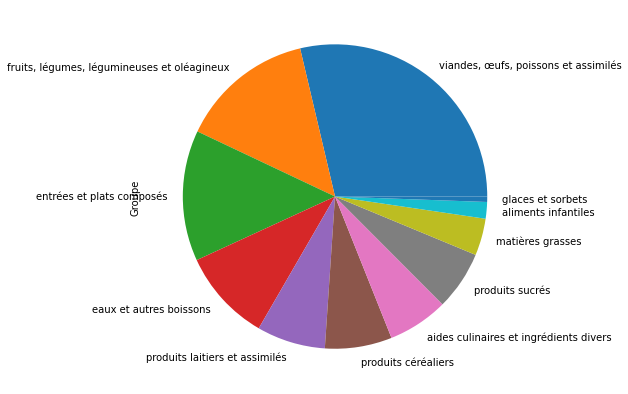

In [20]:
plt.subplots(figsize=(12, 7))
new_data["Groupe"].value_counts().plot.pie()

#### Analyse de distribution de  variables continues (Energie, Eau, Protéines, Glucides, Lipides)

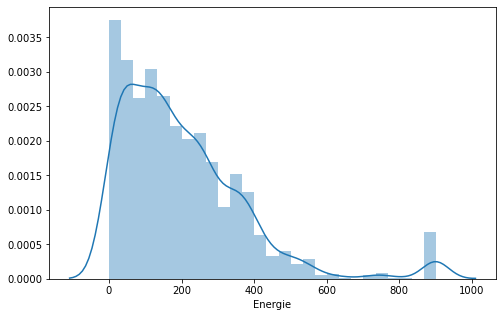

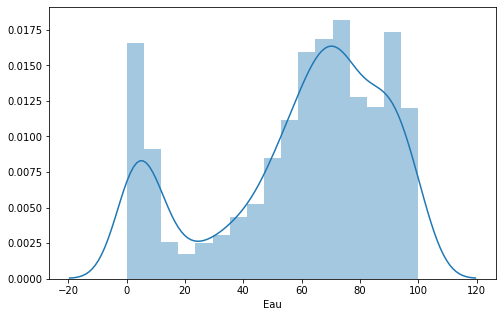

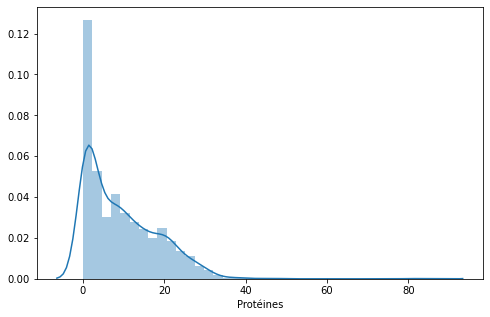

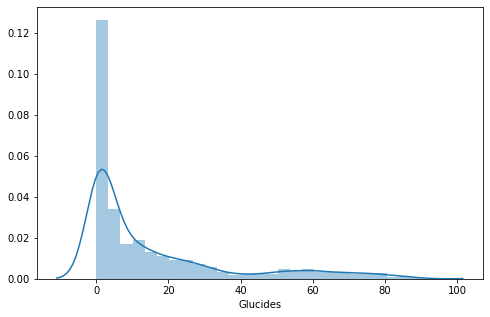

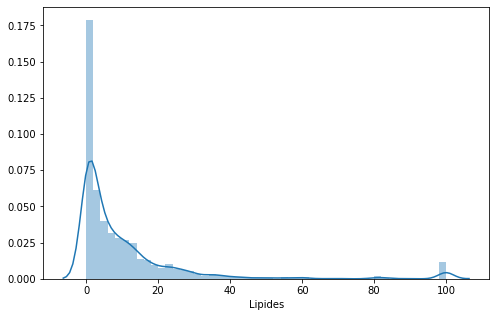

In [22]:
for col in new_data.select_dtypes('float'):
    plt.subplots(figsize=(8, 5))
    sns.distplot(new_data[col])

<p style="font-size: 17px">
On ne peut rien dire sur les distributions de ces variables car elles ne suivent aucune loi usuelle et sont complexes.
</p>

#### Analyse de corrélations

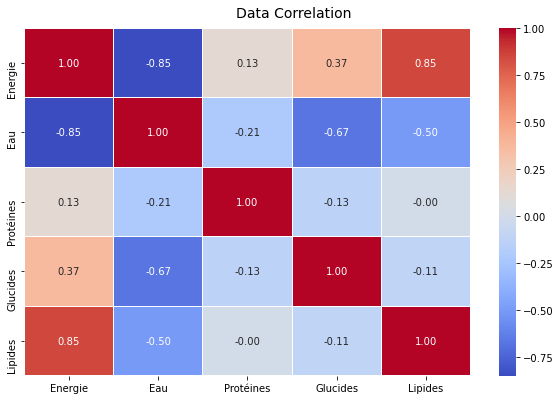

In [21]:
f, ax = plt.subplots(figsize=(10, 6))
corr = new_data.iloc[:, 2:].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Data Correlation', fontsize=14)

<p style="font-size: 17px">
D'après la matrice de corrélation, on peut assumer que l'énergie est négativement corrélée à l'eau (-0.85) et positivement corrélée aux lipides (0.85). De même, la corrélation entre l'eau et les glucides est négative (-0.67). 
</p>

### 4 - Préparation des données à classifier

<p style="font-size: 17px">
Après l'analyse exploratoire de données, nous passons la classification de données en clusters. Pour ce faire, nous utiliserons énergie, eau, protéines, glucides et lipides comme données à partitionner en différents clusters.
</p>

In [22]:
data_to_classify = np.array(new_data.iloc[:, 2:]) # Sélection de Energie, Eau, Protéines, Glucides et Lipides

In [23]:
print(data_to_classify)

[[179.    60.3    4.88  23.7    6.7 ]
 [130.    75.8    4.5    8.87   8.3 ]
 [ 29.9   93.2    0.94   3.07   0.7 ]
 ...
 [391.     1.8   10.    81.1    2.  ]
 [439.     3.     7.5   73.3   12.3 ]
 [396.     1.2    8.5   85.     1.9 ]]


### 5 - Sélection du meilleur k utilisant la méthode Elbow

<p style="font-size: 17px">
Nous utilisons la méthode Elbow afin de déterminer le nombre de clusters permettant de bien partitionner ces données. Nous avons répété cette méthode 5 fois (voir ci-dessous) et il s'est avéré qu'on pouvait prendre 3 ou 4 comme nombre de clusters permettant de segmenter ce jeu de données. En prenant k=4, on arrive à bien partitionner les données en clusters. Ce qui serait optimal pour la classification des aliments. En d'autres termes, k=4 est le compromis entre la variance et le nombre de clusters.
</p>

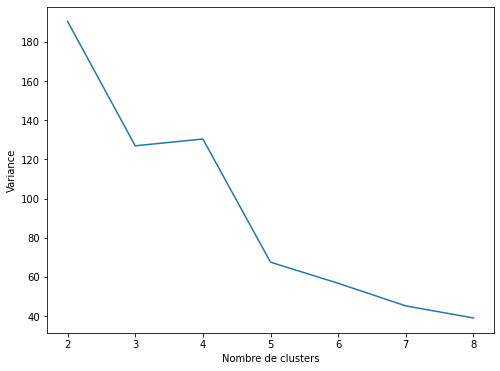

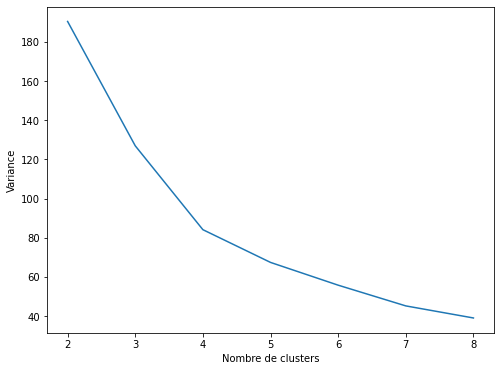

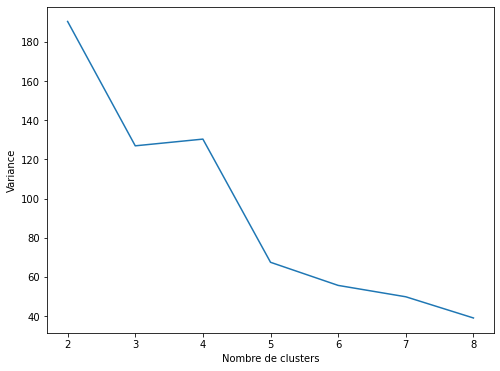

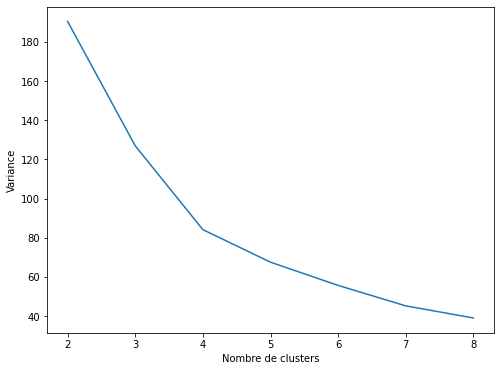

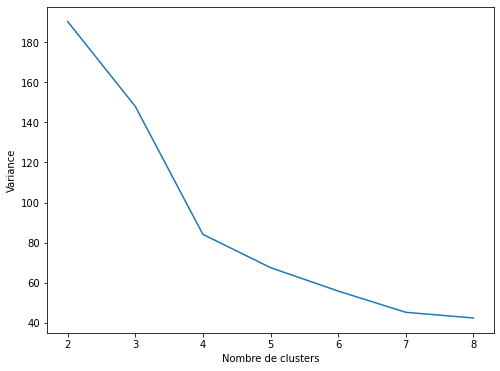

In [24]:
max_cluster = 8
iterations = 1000

for _ in range(5):
    
    variances = []
    for k in range(2, max_cluster+1):
        kmeans = KMeans(k=k, n_iterations=iterations)
        kmeans.fit(data_to_classify)
        V = 0

        for j in range(k):
            for x_j in kmeans.clusters[j]:
                dist = np.linalg.norm(kmeans.centroids[j] - x_j,  axis=0)
                V += dist * dist

        variances.append(V)

    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_cluster+1), variances)
    plt.xlabel("Nombre de clusters")
    plt.ylabel("Variance")
    plt.show()

### 6 - Application de la méthode KMeans avec k=4

In [92]:
kmeans = KMeans(k=4, n_iterations=1000)
kmeans.fit(data_to_classify)
predict = kmeans.predict(data_to_classify)

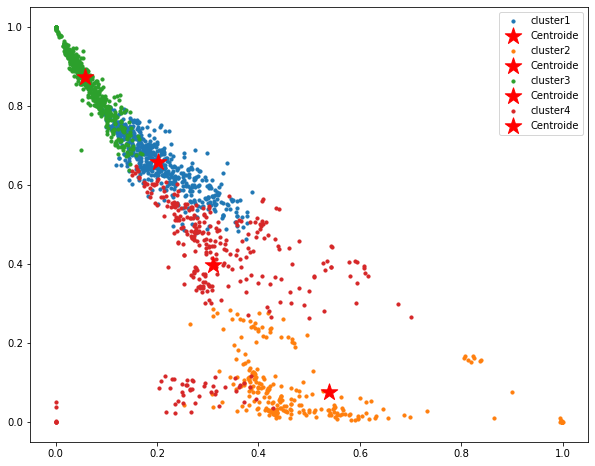

In [93]:
plt.figure(figsize=(10, 8))
for k in range(kmeans.k):    
    label_x, label_y = [], []
    for point in kmeans.clusters[k]:
        label_x.append(point[0])
        label_y.append(point[1])
    plt.scatter(label_x, label_y, s=10,label='cluster'+str(k+1))

    plt.scatter(kmeans.centroids[k][0], kmeans.centroids[k][1], marker='*', s=300, c='r', label='Centroide')

plt.legend()
plt.show()

In [94]:
new_data["Cluster"] = predict # Création de la colonne contenant les clusters

In [95]:
new_data

,Groupe,Nom,Energie,Eau,Protéines,Glucides,Lipides,Cluster
5,entrées et plats composés,"Taboulé ou Salade de couscous, préemballé",179.0,60.3,4.88,23.70,6.7,1
6,entrées et plats composés,"Salade de pomme de terre à la piémontaise, pré...",130.0,75.8,4.50,8.87,8.3,1
9,entrées et plats composés,"Crudité, sans assaisonnement (aliment moyen)",29.9,93.2,0.94,3.07,0.7,2
13,entrées et plats composés,Salade végétale à base de boulgour et/ou quino...,168.0,65.5,4.06,17.40,8.3,1
16,entrées et plats composés,"Salade de chou ou Coleslaw, avec sauce, préemb...",105.0,80.4,0.94,5.78,8.1,2
...,...,...,...,...,...,...,...,...
3181,aliments infantiles,Dessert lacté infantile nature sucré ou aux fr...,100.0,77.7,3.13,12.50,3.5,2
3182,aliments infantiles,"Céréales instantanées, poudre à reconstituer, ...",393.0,2.2,5.10,88.30,1.7,1
3183,aliments infantiles,"Céréales instantanées, poudre à reconstituer, ...",391.0,1.8,10.00,81.10,2.0,1
3184,aliments infantiles,Biscuit pour bébé,439.0,3.0,7.50,73.30,12.3,1


#### Regroupement des aliments par cluster

In [96]:
foods_0 = new_data[new_data['Cluster'] == 0]
foods_1 = new_data[new_data['Cluster'] == 1]
foods_2 = new_data[new_data['Cluster'] == 2]
foods_3 = new_data[new_data['Cluster'] == 3]

#### Aliments de cluster 0

In [97]:
len(foods_0)

102

In [98]:
foods_0["Groupe"].value_counts()

viandes, œufs, poissons et assimilés      85
entrées et plats composés                 14
produits laitiers et assimilés             2
aides culinaires et ingrédients divers     1
Name: Groupe, dtype: int64

#### Aliments de cluster 1

In [99]:
len(foods_1)

1100

In [100]:
foods_1["Groupe"].value_counts()

viandes, œufs, poissons et assimilés           394
entrées et plats composés                      172
produits céréaliers                            120
produits sucrés                                110
aides culinaires et ingrédients divers          81
matières grasses                                68
produits laitiers et assimilés                  63
fruits, légumes, légumineuses et oléagineux     54
eaux et autres boissons                         23
glaces et sorbets                               10
aliments infantiles                              5
Name: Groupe, dtype: int64

#### Aliments de cluster 2

In [101]:
len(foods_2)

550

In [102]:
foods_2["Groupe"].value_counts()

fruits, légumes, légumineuses et oléagineux    197
eaux et autres boissons                        149
produits laitiers et assimilés                  63
entrées et plats composés                       58
aides culinaires et ingrédients divers          27
aliments infantiles                             26
viandes, œufs, poissons et assimilés            25
produits céréaliers                              5
Name: Groupe, dtype: int64

In [103]:
len(foods_3)

5

In [104]:
foods_3["Groupe"].value_counts()

aides culinaires et ingrédients divers    4
matières grasses                          1
Name: Groupe, dtype: int64

## Conclusion

<p style="font-size: 17px">
Avec k=4, la méthode de KMeans implémentée arrive à bien former 4 clusters (groupes) des données qui sont "$homogènes$". Un cluster contient les aliments de types : aides culinaires et ingrédients divers, matières grasses. Il existe deux clusters contenant presque les mêmes informations et regroupant les viandes, œufs, poissons et assimilés, les entrées et plats composés, les produits céréaliers, sucrés, laitiers et assimilés. Enfin, le dernier concerne les fruits, légumes, légumineuses et oléagineux, les eaux et autres boissons. <br/><br/>
<b>Hypothèse</b><br/>
Ces clusters peuvent être bénéfiques pour une entreprise spécialisée dans la vente des aliments contenant les constituants suivants: énergie, eau, protéines, glucides et lipides. Il semblerait qu'un client achétant un produit appartant à un de ces clusters pourrait achéter d'autres produits du même cluster. Ceci dit, si l'entreprise suit la segmentation engendrée par cette méthode, elle pourrait augmenter son chiffre d'affaires. Mais cette hypothèse reste à vérifier. En somme, cette vérification sera l'objet de notre futur travail. En d'autres termes, nous contacterons quelques épiceries en leur proposant cette segmentation de produits. Après une longue durée (mois ou années), nous sérons en mesure d'approuver ou réfuter notre hypothèse.<br/><br/>
Enfin, comme tout algorithme, K-Means présente des avantages et des inconvénients. En effet, il est simple et facile à comprendre. Cependant, il ne permet pas de trouver des groupes ayant des formes complexes. Il est aussi lent car il nécessite de faire passer plusieurs fois les observations. De plus, la solution dépend du choix initial des centres de classes et de l'ordre des données (individus).
</p>

## Références

<p style="font-size: 17px">
[1] Quelle distance choisir en machine learning, Pensée Artificielle, url: <a href="https://penseeartificielle.fr/choisir-distance-machine-learning/" target="_blank">Lien</a><br/><br/>
[2] Youguo Li, Haiyan Wu, "A Clustering Method Based on K-Means Algorithm", International Conference on Solid State Devices and Materials Science, 2012<br/><br/> 
[3] <a href="https://ciqual.anses.fr/" target="_blank">Site de l'ANSES (France)</a><br/><br/>
[4] Table de composition nutritionnelle des aliments Ciqual 2020, Contexte et présentation générale,p.1<br/><br/>
[5] Table de composition nutritionnelle des aliments Ciqual 2020, Documentation, p.1<br/><br/>
</p>